# Nickolas4 Portfolio

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as dr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [2]:
#Generate portfolio
symbols = ['AAPL', 'MSFT', 'TLT', 'USO', 'GLD', 
           'SPY', 'MCD', 'KO', 'DOW', 'EMB']
asset_count = len(symbols)

In [3]:
#Empty DF to store web data
nickolas4 = pd.DataFrame()

In [4]:
risk_free = dr('^IRX', data_source='yahoo', 
                       start='2010-01-01')['Adj Close']/100
risk_free = risk_free.mean()
risk_free

0.0012219665045921087

In [5]:
#Add 10 historic asset returns from Yahoo
for i in symbols:
    nickolas4[i] = dr(i, data_source='yahoo', 
    start='2010-01-01', end='2015-01-01')['Adj Close'].round(2)
nickolas4.columns = symbols

nickolas4.tail()

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
Date,,,,,,,,,,
2014-12-24,106.83,45.34,117.05,21.05,112.77,198.43,87.35,39.90,42.19,99.35
2014-12-26,108.72,45.09,117.48,20.78,114.83,199.07,88.23,39.92,42.62,99.28
2014-12-29,108.64,44.69,118.36,20.30,113.67,199.33,88.47,39.82,42.56,98.79
2014-12-30,107.32,44.28,118.68,20.29,115.20,198.26,87.74,39.73,42.63,99.06
2014-12-31,105.28,43.75,118.91,20.36,113.58,196.30,87.23,39.23,42.20,98.30


#### Normalize data

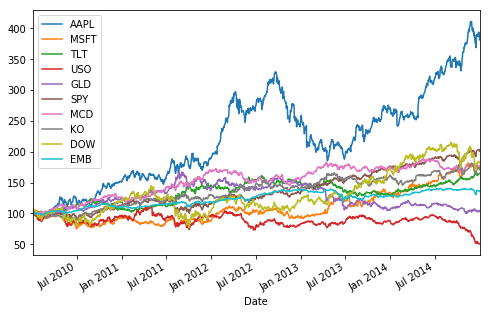

In [6]:
#Normalize Data - Method 1
(nickolas4 / nickolas4.ix[0] * 100).plot(figsize=(8,5))

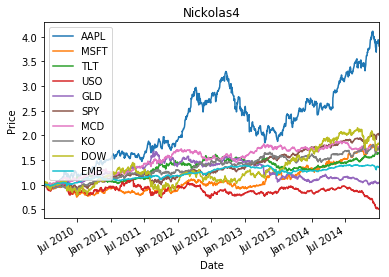

In [7]:
#Normalize Data - Method 2
def normalize_data(df):
    #normalized data
    norm_data = df/df.ix[0, :]
    
    #Plot Data
    ax = norm_data.plot(title='Nickolas4', fontsize = 10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()  #Must be called in order to show plots in some environments

normalize_data(nickolas4)

## Asset Returns

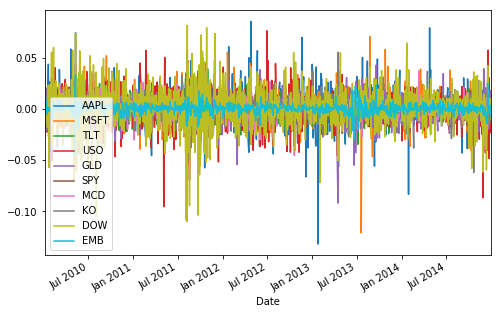

In [8]:
#DF of Logarithim Returns
n4_log = np.log(nickolas4/nickolas4.shift(1))
n4_log.plot(figsize=(8,5))

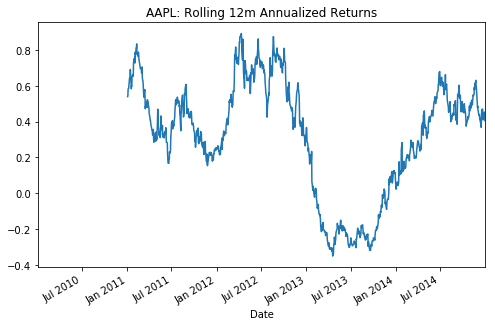

In [9]:
#DF of Rolling Annualized Returns
n4_rolling12mrets = pd.rolling_mean((1 + n4_log), window=252) ** 252 - 1
n4_rolling12mrets['AAPL'].plot(figsize=(8,5), title="AAPL: Rolling 12m Annualized Returns")

In [10]:
#DF of Avg. Annualized Performances 
n4_meanrets = np.log(nickolas4/nickolas4.shift(1)).mean() * 252
n4_meanrets

AAPL    0.268328
MSFT    0.107749
TLT     0.100524
USO    -0.136732
GLD     0.006786
SPY     0.139697
MCD     0.112294
KO      0.107743
DOW     0.120458
EMB     0.061254
dtype: float64

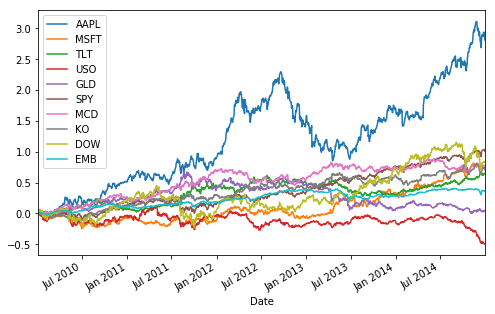

In [11]:
#Cumulative Returns
n4_cumrets = (nickolas4/nickolas4.ix[0]) - 1
n4_cumrets.plot(figsize=(8,5))

## Asset Volatility

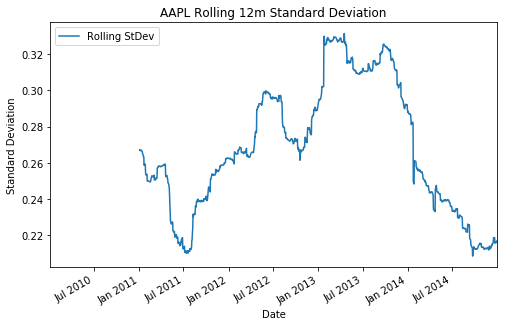

In [12]:
def rolling_stdev_asset(df,ticker):
    #Compute rolling stdev using a 252-day rolling window
    z = pd.rolling_std(df[ticker] * np.sqrt(252), window=252)
    
    #Define the axis
    ax = z.plot(figsize=(8,5), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.title(ticker + " Rolling 12m Standard Deviation")
    plt.show()
    
rolling_stdev_asset(n4_log, "AAPL")

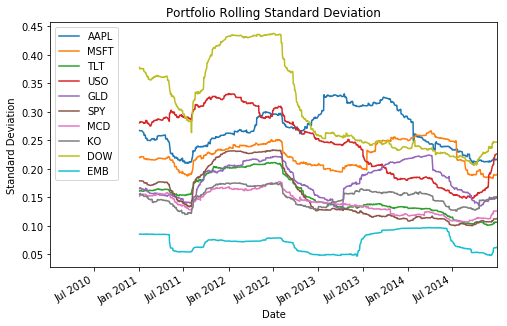

In [13]:
#Rolling Standard Deviation function - Method 1 
def rolling_stdev_multiasset():

    #Compute rolling stdev using a 252-day rolling window
    roll_stdev = pd.rolling_std(n4_log * np.sqrt(252), window=252)
    
    #Define the axis
    ax = roll_stdev.plot(figsize=(8,5), title = 'Portfolio Rolling Standard Deviation',\
                      label='Rolling StDev')
    
    #Add axis labels and legends
    ax.set_xlabel('Date')
    ax.set_ylabel('Standard Deviation')
    ax.legend(loc='upper left')
    plt.show()

rolling_stdev_multiasset()

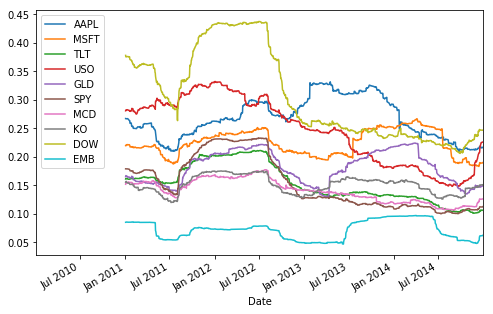

In [14]:
#DF of Rolling Annualized StDev - Method 2
n4_rolling_stdev = pd.rolling_std(n4_log, window=252) * np.sqrt(252)
n4_rolling_stdev.plot(figsize=(8,5))

## Variance-Covariance Matrix

In [15]:
# Variance-Covariance Matrix
n4_cov = n4_log.cov()
n4_cov

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
AAPL,0.000282,0.000081,-0.000047,0.000074,0.000020,0.000090,0.000049,0.000045,0.000135,0.000017
MSFT,0.000081,0.000195,-0.000047,0.000072,0.000008,0.000090,0.000049,0.000054,0.000140,0.000014
TLT,-0.000047,-0.000047,0.000092,-0.000055,0.000012,-0.000055,-0.000028,-0.000034,-0.000091,-0.000002
USO,0.000074,0.000072,-0.000055,0.000266,0.000054,0.000086,0.000045,0.000052,0.000155,0.000020
GLD,0.000020,0.000008,0.000012,0.000054,0.000129,0.000008,0.000003,0.000002,0.000025,0.000010
SPY,0.000090,0.000090,-0.000055,0.000086,0.000008,0.000100,0.000053,0.000060,0.000159,0.000017
MCD,0.000049,0.000049,-0.000028,0.000045,0.000003,0.000053,0.000081,0.000042,0.000076,0.000011
KO,0.000045,0.000054,-0.000034,0.000052,0.000002,0.000060,0.000042,0.000094,0.000086,0.000012
DOW,0.000135,0.000140,-0.000091,0.000155,0.000025,0.000159,0.000076,0.000086,0.000407,0.000029
EMB,0.000017,0.000014,-0.000002,0.000020,0.000010,0.000017,0.000011,0.000012,0.000029,0.000022


## Correlation Matrix

In [16]:
# Correlation Matrix
n4_corr = n4_log.corr()
n4_corr

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB
AAPL,1.000000,0.345757,-0.289745,0.271615,0.102485,0.533544,0.326052,0.277079,0.399375,0.217038
MSFT,0.345757,1.000000,-0.349523,0.315310,0.048433,0.645896,0.394895,0.397323,0.498756,0.208150
TLT,-0.289745,-0.349523,1.000000,-0.351570,0.105755,-0.573996,-0.321182,-0.364761,-0.471714,-0.044919
USO,0.271615,0.315310,-0.351570,1.000000,0.292684,0.526174,0.309505,0.327834,0.471904,0.256251
GLD,0.102485,0.048433,0.105755,0.292684,1.000000,0.071320,0.031175,0.019606,0.107591,0.181706
SPY,0.533544,0.645896,-0.573996,0.526174,0.071320,1.000000,0.594823,0.618375,0.784864,0.358728
MCD,0.326052,0.394895,-0.321182,0.309505,0.031175,0.594823,1.000000,0.487397,0.422448,0.255594
KO,0.277079,0.397323,-0.364761,0.327834,0.019606,0.618375,0.487397,1.000000,0.437023,0.253736
DOW,0.399375,0.498756,-0.471714,0.471904,0.107591,0.784864,0.422448,0.437023,1.000000,0.299960
EMB,0.217038,0.208150,-0.044919,0.256251,0.181706,0.358728,0.255594,0.253736,0.299960,1.000000


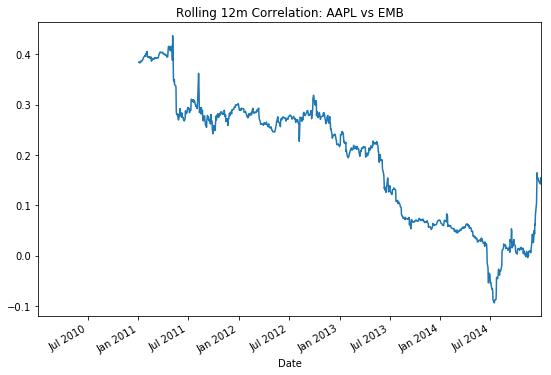

In [17]:
#Rolling Correlation of AAPL & EMB 
pd.rolling_corr(n4_log['AAPL'],n4_log['EMB'],
                window=252).plot(figsize=(9,6),
                                 title='Rolling 12m Correlation: AAPL vs EMB')

## EqualWeight Portfolio

* 10 assets
* 10% weights
* Diversified between US Equities, US Treasuries, Crude Oil, and Gold. 

In [18]:
#Create DF w/USD values of each asset
def equalwgt_portfolio(df):
    start_value = 10000100  #10MM USD
    wghts = 0.1
    share_count = ((start_value * wghts) / df.ix[0])
    portfolio = df * share_count
    portfolio['Portfolio (MM $)'] = portfolio.sum(axis=1)
    return (portfolio/1000)   # Show values as thousands

equalwgt_portfolio(nickolas4).tail()

,AAPL,MSFT,TLT,USO,GLD,SPY,MCD,KO,DOW,EMB,Portfolio (MM $)
Date,,,,,,,,,,,
2014-12-24,3869.288964,1773.883153,1625.259240,522.726856,1027.059451,2029.164376,1753.329456,1740.855105,1823.268016,1371.872321,17536.706939
2014-12-26,3937.743108,1764.102148,1631.229864,516.022046,1045.821023,2035.709078,1770.993222,1741.727714,1841.850743,1370.905728,17656.104672
2014-12-29,3934.845578,1748.452539,1643.448814,504.102384,1035.256254,2038.367863,1775.810612,1737.364668,1839.257805,1364.139573,17621.046090
2014-12-30,3887.036335,1732.411690,1647.892069,503.854058,1049.190820,2027.425939,1761.157716,1733.437928,1842.282900,1367.867862,17552.557316
2014-12-31,3813.149323,1711.675959,1651.085658,505.592342,1034.436574,2007.382790,1750.920761,1711.622701,1823.700173,1357.373419,17366.939698


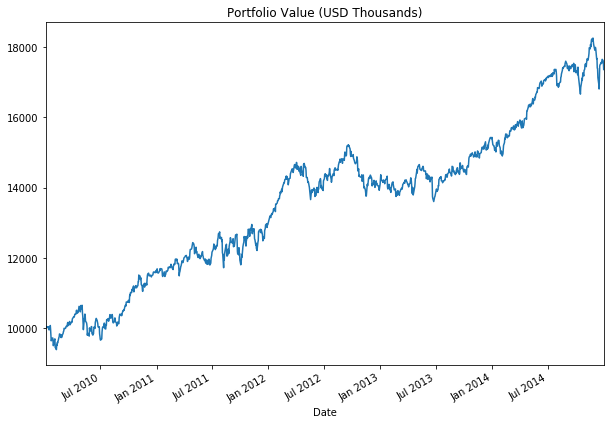

In [19]:
#Portfolio Value in USD
n4_equalwght = equalwgt_portfolio(nickolas4)['Portfolio (MM $)']
n4_equalwght.plot(figsize=(10,7),title="Portfolio Value (USD Thousands)")

### Portfolio Performance

#### Log Returns

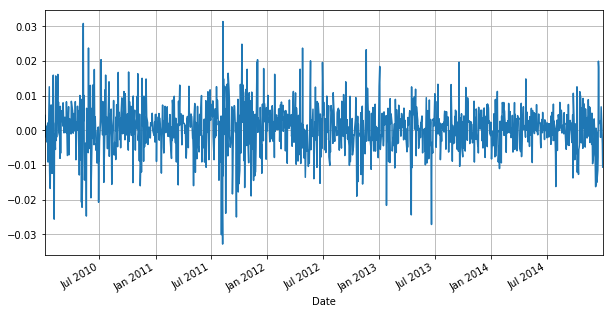

In [20]:
#Log Returns
def log_return(df):
    lr = np.log(df/df.shift(1))
    lr = lr.fillna(value=0)
    return lr

#Define object w/portfolio log returns as a series
n4_equalwght_logrets = log_return(n4_equalwght)

#Plot Log Returns
n4_equalwght_logrets.plot(figsize=(10,5), grid=True)

#### Annualized Returns

In [21]:
#Avg Annualized Return
def returns_average(df):
    ret =  np.log(df/df.shift(1)).mean()*252
    return ret

returns_average(n4_equalwght)

0.1106581294533712

#### Variance

In [22]:
def pf_volatility(df):
    stdev = df.std() * np.sqrt(252)
    var = stdev**2
    return stdev
pf_volatility(n4_equalwght_logrets)

0.10964099291651817

#### Sharpe Ratio

In [23]:
def sharpe_ratio(df):
    ret = returns_average(n4_equalwght)
    rf = risk_free
    risk = pf_volatility(df)
    sharpe = (ret-rf)/risk
    return sharpe

sharpe_ratio(n4_equalwght_logrets)


0.99813181217817826

In [24]:
def portfolio_stats(portf):
    ret = portf.mean() * 252
    stdev = pf_volatility(portf)
    var = (stdev**2)
    rf = risk_free
    sharpe = (ret - rf)/stdev
    
    print("Avg Annualized Return = %3.2f") %ret
    print ("Risk-free rate = %3.4f") %rf
    print("Variance = %3.2f") %var
    print("Standard deviation = %3.2f") %stdev
    print ('Sharpe Ratio = %3.2f') %sharpe
    
    
portfolio_stats(n4_equalwght_logrets)

Avg Annualized Return = 0.11
Risk-free rate = 0.0012
Variance = 0.01
Standard deviation = 0.11
Sharpe Ratio = 1.00


## Rolling Stats

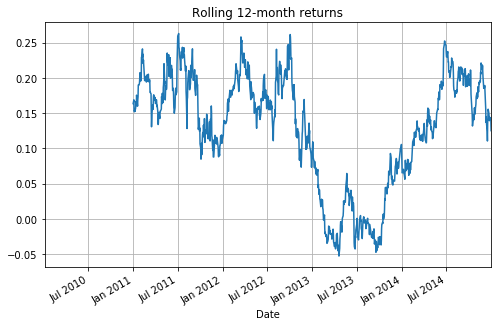

In [25]:
def pf_rolling_return(df):
    x = pd.rolling_mean((1+df), window=252) ** 252 - 1
    return x


pf_rolling_return(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling 12-month returns')



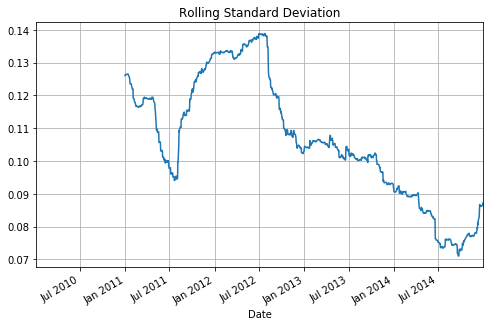

In [26]:
def pf_rolling_stdev(df):
    x = pd.rolling_std((1+df), window=252) * np.sqrt(252)
    return x

pf_rolling_stdev(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling Standard Deviation')

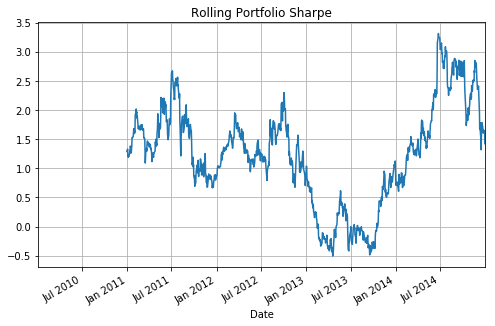

In [27]:
def pf_rolling_sharpe(df):
    df.fillna(value=0)
    rf = risk_free
    x = pf_rolling_stdev(df)
    y = pf_rolling_return(df)
    s = (y-rf)/x
    return s

pf_rolling_sharpe(n4_equalwght_logrets).plot(grid=True,figsize=(8,5), 
                                             title='Rolling Portfolio Sharpe')

# 1.) Modern Portfolio Theory

* Weights must add to 100% 
* No shorting

In [28]:
weights = np.random.random(len(n4_log.columns))  #generate 10 random numbers between 0 and 1
weights /= np.sum(weights)       #normalize values so that sum = 1 

In [29]:
# 100% Allocation
print sum(weights)
print weights

1.0
[ 0.04594336  0.13126034  0.13981957  0.04376405  0.14959234  0.15635832
  0.08322751  0.09786285  0.12753159  0.02464006]


#### Expected Portfolio Return

In [30]:
# Expected Portfolio Return
def pf_return(df):
    mu = np.sum(df.mean() * weights) * 252
    return mu
pf_return(n4_log)

0.0941616739778048

#### Expected Portfolio Risk

In [31]:
def pf_var(df):
    sigma_sqrd = np.dot(weights.T, np.dot(df.cov() * 252, weights))
    return sigma_sqrd
pf_var(n4_log)

0.012009846455299523

In [32]:
def pf_stdev(df):
    sigma = np.sqrt(np.dot(weights.T, np.dot(df.cov() * 252, weights)))
    return sigma
pf_stdev(n4_log)

0.10958944499950496

#### Sharpe Ratio

In [33]:
def pf_sharpe(df):
    mu = pf_return(df)
    sigma = pf_stdev(df)
    rf = risk_free
    SR = (mu-rf)/sigma
    return SR
pf_sharpe(n4_log)

0.84807170502261886

In [34]:
def pf_stats(df):    
    x = pf_stdev(df)    
    y = pf_return(df)
    rf = risk_free
    var = pf_var(df)
    sharpe = (y-rf)/x
    
    print("Expected Portfolio Stats\n") + 40 * "-" + "\n"
    print("Annual Return = %3.2f") %y
    print ("Risk-free rate = %3.4f") %rf
    print("Variance = %3.4f") %var
    print("Standard deviation = %3.4f") %x
    print ('Sharpe Ratio = %3.2f') %sharpe
    
pf_stats(n4_log)

Expected Portfolio Stats
----------------------------------------

Annual Return = 0.09
Risk-free rate = 0.0012
Variance = 0.0120
Standard deviation = 0.1096
Sharpe Ratio = 0.85


# 2.) Monte Carlo Simulation 

* Generate vectors of random portfolio weights on a larger scale. 


* For every simulated allocation, we record the resulting portflio return and variance. 


* Of paramount interest to investors is the risk-return profiles that are possible for a given set of securities and their statistical characteristics.

In [35]:
#Iterations
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(asset_count)
    weights /= np.sum(weights)
    prets.append(np.sum(n4_log.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(n4_log.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

* Illustrate the resulting values from the Monte Carlo Simulation

* Show the sharpe ratio (assume Risk-Free = 0)

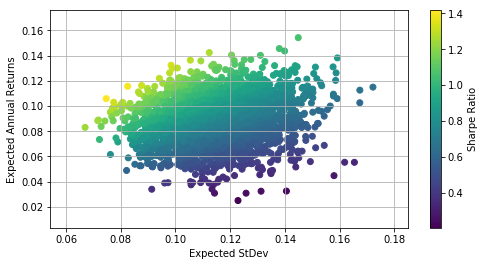

In [36]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c = prets/pvols, marker = 'o')
plt.grid(True)
plt.xlabel("Expected StDev")
plt.ylabel('Expected Annual Returns')
plt.colorbar(label = 'Sharpe Ratio')

* It is clear by inspection from the above graph that not all weight distributions perform well when measured in terms of mean and variance. 

* For example, for a fixed level of risk, say 20%, there are multiple portfolios with distinct returns. As as investor one is generally interested in the maximum retrun given a fixed level of risk or the minimum risk given a return expectation.... (Known as the efficient frontier)

# 3.) Portfolio Optimization

#### Method 1 - Maximize Sharpe Ratio 

* Minimize negative values

In [37]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(n4_log.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(n4_log.cov() * 252, weights)))
    return np.array([pret, pvol, pret/pvol])

In [38]:
def maximize_sharpe(weights):
    return -statistics(weights)[2]

* Constraint is that all parameters add up to 1, and can be formulated using the conventions of the minimize function

In [39]:
cons = ({'type':'eq', 'fun': lambda x: np.sum(x) - 1})

* Bound parameter values to be within 0.05 and 1. 


* These values are provided to the minimization function as a tuple of tuples in this case:

In [40]:
bnds = tuple((0.05, 1) for x in range(asset_count))

*  A starting parameter list (weight values) is needed to call the optimization function


* Equal Distribution of Weights of 10% (initial guesses for the weights). 

In [41]:
asset_count * [1. / asset_count,]

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

* Store optimization results in an object

In [42]:
pf_optimize_sharpe = sco.minimize(maximize_sharpe, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)

* Call the function

In [43]:
pf_optimize_sharpe

  status: 0
 success: True
    njev: 8
    nfev: 98
     fun: -1.4695537587786316
       x: array([ 0.13594668,  0.05      ,  0.41071641,  0.05      ,  0.05      ,
        0.07027608,  0.06839083,  0.06467001,  0.05      ,  0.05      ])
 message: 'Optimization terminated successfully.'
     jac: array([-0.4038464 ,  0.30612145, -0.4017327 ,  3.69313182,  1.19844052,
       -0.4033805 , -0.40310122, -0.4038948 ,  1.07055625, -0.2295274 ,  0.        ])
     nit: 8

* Retrieve the optimal portfolio composition by accessing the results object by providing the key of interest (x, in our case). 


* Optimal Portfolio has only 5 assets out of 10 total

In [44]:
pf_optimize_sharpe['x'].round(3)

array([ 0.136,  0.05 ,  0.411,  0.05 ,  0.05 ,  0.07 ,  0.068,  0.065,
        0.05 ,  0.05 ])

In [45]:
#Portfolio weights sum to 1
np.sum(pf_optimize_sharpe['x'].round(3))

1.0

In [46]:
#Using the portfolio weights from the optimization, the following statistics emerge:
statistics(pf_optimize_sharpe['x']).round(3)

array([ 0.11 ,  0.075,  1.47 ])

* Optimal Portfolio Weights

In [47]:
expd_return = statistics(pf_optimize_sharpe['x']).round(3)[0] - risk_free
expd_risk = statistics(pf_optimize_sharpe['x']).round(3)[1]
sharpe = statistics(pf_optimize_sharpe['x']).round(3)[2]

In [48]:
def portfolio_results():
    print "Portfolio Results (%)"
    print 30 * "-"
    print "Expected Return = %4.3f" % expd_return
    print "Risk free rate = %4.3f" %risk_free
    print "Standard Deviation = %4.3f" % expd_risk
    print "Sharpe Ratio = %4.3f" % sharpe
portfolio_results()

Portfolio Results (%)
------------------------------
Expected Return = 0.109
Risk free rate = 0.001
Standard Deviation = 0.075
Sharpe Ratio = 1.470


#### Method 2 -  Minimize Portfolo Variance

In [49]:
def minimize_variance(weights):
    return statistics(weights)[1] ** 2

In [50]:
pf_minimize_variance = sco.minimize(minimize_variance, asset_count * [1. / asset_count,], method='SLSQP',
                                   bounds = bnds, constraints=cons)

In [51]:
#Absolute Minimum Variance Portfolio (on the efficient frontier curve)
pf_minimize_variance  

  status: 0
 success: True
    njev: 15
    nfev: 180
     fun: 0.0041160712367515027
       x: array([ 0.05      ,  0.05      ,  0.32745693,  0.05      ,  0.05      ,
        0.05      ,  0.05      ,  0.05      ,  0.05      ,  0.27254307])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.01425063,  0.01155185,  0.00619292,  0.01393015,  0.00950231,
        0.00953552,  0.00701558,  0.00697449,  0.01870153,  0.00598484,  0.        ])
     nit: 15

* Minimum variance portfolio only contains 5 assets ot of the possible 10.

In [52]:
pf_minimize_variance['x'].round(3)

array([ 0.05 ,  0.05 ,  0.327,  0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.05 ,
        0.05 ,  0.273])

In [53]:
ER = statistics(pf_minimize_variance['x']).round(3)[0] - risk_free
STDEV = statistics(pf_minimize_variance['x']).round(3)[1]
SHARPE = statistics(pf_minimize_variance['x']).round(3)[2]

In [54]:
def portfolio_results():
    print "Portfolio Results (%)"
    print 30 * "-"
    print "Expected Return = %4.3f" % ER
    print "Standard Deviation = %4.3f" % STDEV
    print "Sharpe Ratio = %4.3f" % SHARPE
portfolio_results()

Portfolio Results (%)
------------------------------
Expected Return = 0.085
Standard Deviation = 0.064
Sharpe Ratio = 1.339


# 4.) Efficient Frontier

* The derivation of all optimal portfolios - i,e, all portfolios with minimum volatility for a given target return level (or all portfolios with maximum return for a given level of risk level) - is similar to the previous optimization


* The only difference is that we have to iterate over multiple starting conditions. The approach we take is that we fix a target return level and derive for each such level those portfolio weights that lead to the minimum volatility value. 


* For the optimization, this leads to two conditions: 
        1.) target return level (trets) 
        2.) sum of portfolio weights. 


* The boundary values for each parameter remain the same

In [55]:
#Optimization Constraints
cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - tret}, 
      {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

#Boundary values
bnds = tuple((0.01,1) for x in weights)

* For clarity, define a dedicated function for use in the minimization process (min_func_port)
* It merely returns the volatility values from the statistics function

In [56]:
#Minimization of Portfolio vol
def min_func_port(weights):
    return statistics(weights)[1]

#Maximize Sharpe Volatility
def maximize_sharpe(weights):
    return -statistics(weights)[2]

#Minimize Variance
def minimize_variance(weights):
    return statistics(weights)[1] ** 2

* When iterating over different target levels (trets), one condition for the minimization changes


* That is why the conditions dictionary is updated during every loop

In [57]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 9.12 s, sys: 12 ms, total: 9.13 s
Wall time: 9.14 s


* Crosses indicated the optimal portfolios given a certain target return


* The dots are portfolios


* Figure shows two larger stars: 
        
    1.) minimum volatility portfolio (the leftmost portfolio) 

    2.) maximum Sharpe Ratio (top-middle portfolio)
        

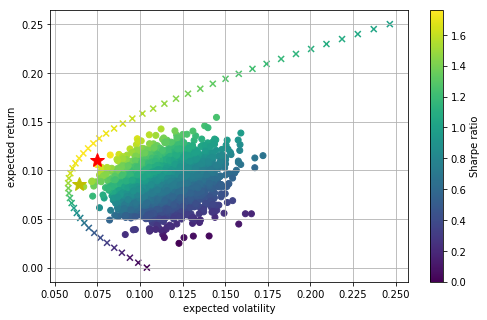

In [58]:
#Optimization Results

plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(pf_optimize_sharpe['x'])[1], statistics(pf_optimize_sharpe['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(pf_minimize_variance['x'])[1], statistics(pf_minimize_variance['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

* The efficient frontier is compromised of all optimal portfolios with a higher return than the absolute minimum variance portflios. These portfolios dominae all other portfolos in terms of expected returns given a certain level of risk. 


# 5.) Capital Market Line
* A tangent line of the efficient frontier taht goes through the risk-return point of the riskless portfolio. 

* For example, consider a riskless rate of rf = 0.01. We look for that portfolio on the efficient frontier for which the tangent goes through the point (stdev*rf)=(0, 0.01) in risk-return space.

* For the calculation to follow, we need a functional approximation and the first derivative for the efficient frontier. We use cubic splines interpolation to this end. 

In [59]:
import scipy.interpolate as sci

In [60]:
#For spline interpolation, only use the portfolios from the efficient frontier. 
#The following code selects these portfolios from our previously used sets tvols & trets

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

- the new ndarray objects 'evols' and 'erets' are used for the interpolation

In [61]:
tck = sci.splrep(evols, erets)

* Via this numerical route we end up being able to define a continuously differentiable function f(x) for the efficient frontier and the respective first derivative function df(x):

In [62]:
def f(x):
    "Efficient Frontier function (splines approximation)"
    return sci.splev(x, tck, der=0)
def df(x):
    "First derivative of efficient frontier function"
    return sci.splev(x, tck, der=1)


* What we are looking for is a function t(x)=a+b*x describing the line that passes throught the riskless asset in risk-return space and that is tangent to the efficient frontier. 

* The function has to satisfy all of the below conditions:
        t(x) = a+b*x
        t(0) = rf    <----------> a = rf
        t(x) = f(x)  <----------> a+b*x = f(x)
        t(x) = f(x)  <----------> b = f(x)

* We have to solve the system of equations since we do not have a closed formula for the efficient front or the first derivative. To this end, we define a Python function that returns the values of all three equations given the parameter set p = (a,b,x) 


In [63]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

* The function fsolve from scipy.optimize is capable of solving such a system of equations. 


* We provide an initial parametrization in addtion to the function equations. 


* Note that success or failure of the optimiation might depend on the initial parametrization, which therefore ahs to be chosen carefully - generally by a combination of educated guesses with trial and error: 

In [64]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

* The numerical optimization yields the following values. As desired, we have a = rf = 0.01

In [65]:
opt

array([ 0.01      ,  1.61933714,  0.07183509])

* The three equations, as desired, are also zero: 

In [66]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

* The scatterplot represents the results graphically


* The star represents the optimal portfolio from th efficient frontier where the tangent line passes through the riskless asset point (0,rf = 0.01). 


* The optimal portfilio has an expected volatility of 20.5% and an expected return of 17.6%. 

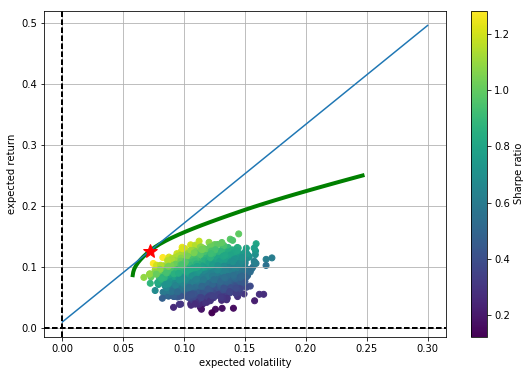

In [67]:
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
plt.figure(figsize=(9, 6))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [68]:
#Constraints
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

res = sco.minimize(min_func_port, asset_count * [1. / asset_count,], method='SLSQP',
                       bounds=bnds, constraints=cons)

#### Asset Weights 

In [69]:
res['x'].round(2)

array([ 0.12,  0.01,  0.43,  0.01,  0.01,  0.23,  0.07,  0.07,  0.01,  0.04])

#### Sum of Portfolio Weights

In [70]:
sum(res['x']).round(1)

1.0

#### END OF PORTFOLIO MANAGEMENT

In [71]:
4**4

256

In [ ]:
NICKOLAS4

In [72]:
#Spline Interpolation
tck

(array([ 0.0578353 ,  0.0578353 ,  0.0578353 ,  0.0578353 ,  0.05909576,
         0.06039947,  0.06212678,  0.06424963,  0.06672804,  0.06952363,
         0.07260063,  0.07603106,  0.08011002,  0.08476909,  0.08991994,
         0.09548117,  0.10142388,  0.1077156 ,  0.11429777,  0.12112304,
         0.12815258,  0.13535457,  0.1427029 ,  0.15018326,  0.15793379,
         0.1659789 ,  0.1742778 ,  0.18279594,  0.19150406,  0.20037738,
         0.20939492,  0.21853881,  0.22779385,  0.24658715,  0.24658715,
         0.24658715,  0.24658715]),
 array([ 0.08673469,  0.09326047,  0.09710539,  0.10283558,  0.10761104,
         0.11264451,  0.11764543,  0.12268881,  0.12781865,  0.13312688,
         0.13807427,  0.14311345,  0.14814945,  0.15323068,  0.1583087 ,
         0.16337917,  0.16845939,  0.17354427,  0.17863269,  0.18372577,
         0.18881549,  0.19397318,  0.19907514,  0.20416027,  0.20925   ,
         0.21434178,  0.21943557,  0.22453082,  0.22962725,  0.23472464,
         0.2415